# Introduction

My goal with this project is to deeply understand the dynamics of the stock market and provide insights that help investors make more informed decisions. By analyzing 20 years of historical Google stock data, I aim to uncover trends, measure volatility, and predict future price movements using advanced machine learning techniques. This analysis is designed to deliver actionable insights that enhance investment and trading strategies.

## Goal

The primary objective of my project is to predict Google’s future stock prices based on historical data. Leveraging advanced algorithms such as Long Short-Term Memory (LSTM) models, I aim to identify patterns and trends that guide investment decisions and minimize risks. By doing so, my goal is to empower investors and traders to make data-driven decisions with confidence.

### Methodology

**1. Data Source:**
 
- I worked with 20 years of Google stock data, including daily opening, closing, high, and low prices, along with trading volumes.
- The dataset was sourced from Kaggle: Google Stock Data 20 Years.

**2. Data Preparation:**

- I processed raw data by handling missing values and removing anomalies.
- The data was scaled and transformed into time-series sequences to ensure compatibility with LSTM models.


**3. Baseline Models:**

- I started with basic machine learning models like Linear Regression and Random Forest to establish initial benchmarks for performance.

**4. Advanced Modeling:**

- To capture complex temporal patterns, I implemented LSTM models and optimized them using hyperparameter tuning and callback methods such as EarlyStopping.

**5. Evaluation and Visualization:**

- I evaluated my models using metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), and R².

- I visualized predictions alongside actual stock prices to provide clear insights into model performance.

### Scope

This project helped me develop a strong understanding of stock market analysis. I believe it can be especially useful for investors and traders in the following areas:

**Identify Historical Trends**  Gaining insights into long-term and short-term market movements.

**Anticipate Volatility**  Predicting price fluctuations to minimize risks.

**Enhance Strategies:** Using data-driven insights to optimize investment and trading strategies.

The methods and analyses I developed in this project bridge the gap between technical analysis and actionable financial strategies. This allows for a robust tool to understand Google stock behavior and predict future price movements effectively.

# Data Cleaning and Preprocessing

### Imports

In [254]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [255]:
data = pd.read_csv(r'C:\Users\Elif Surucu\Documents\Flatiron\Assesments\Project4\Google-Stock-Market-Data\data.csv')
data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Year,Volatility,Month,Volume_Category
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.499133,897427216,2004,0.201743,8,Very High
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.697639,458857488,2004,0.213699,8,Very High
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.724787,366857939,2004,0.110336,8,Very High
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.611960,306396159,2004,0.200000,8,Very High
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.640104,184645512,2004,0.102616,8,Very High


In [256]:

print(data.head())

         Date      Open      High       Low     Close  Adj Close     Volume  \
0  2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1  2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2  2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3  2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4  2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  
0  2004    0.201743      8       Very High  
1  2004    0.213699      8       Very High  
2  2004    0.110336      8       Very High  
3  2004    0.200000      8       Very High  
4  2004    0.102616      8       Very High  


In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4936 entries, 0 to 4935
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             4936 non-null   object 
 1   Open             4936 non-null   float64
 2   High             4936 non-null   float64
 3   Low              4936 non-null   float64
 4   Close            4936 non-null   float64
 5   Adj Close        4936 non-null   float64
 6   Volume           4936 non-null   int64  
 7   Year             4936 non-null   int64  
 8   Volatility       4936 non-null   float64
 9   Month            4936 non-null   int64  
 10  Volume_Category  4936 non-null   object 
dtypes: float64(6), int64(3), object(2)
memory usage: 424.3+ KB


In [258]:
print(data.describe())

              Open         High          Low        Close    Adj Close  \
count  4936.000000  4936.000000  4936.000000  4936.000000  4936.000000   
mean     43.077417    43.532659    42.644088    43.096952    43.096952   
std      40.320485    40.773849    39.917290    40.352092    40.352092   
min       2.470490     2.534002     2.390042     2.490913     2.490913   
25%      12.923497    13.048528    12.787071    12.922438    12.922438   
50%      26.795184    26.966079    26.570000    26.763133    26.763133   
75%      58.855251    59.352863    58.164000    58.788999    58.788999   
max     154.009995   155.199997   152.919998   154.839996   154.839996   

             Volume         Year   Volatility        Month  
count  4.936000e+03  4936.000000  4936.000000  4936.000000  
mean   1.174059e+08  2013.930308     0.888572     6.560981  
std    1.505185e+08     5.672880     1.057015     3.453135  
min    1.584340e+05  2004.000000     0.038605     1.000000  
25%    2.803600e+07  2009.00

In [259]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Ensure no duplicates
data = data.drop_duplicates()

# Recheck missing values
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
Year               0
Volatility         0
Month              0
Volume_Category    0
dtype: int64


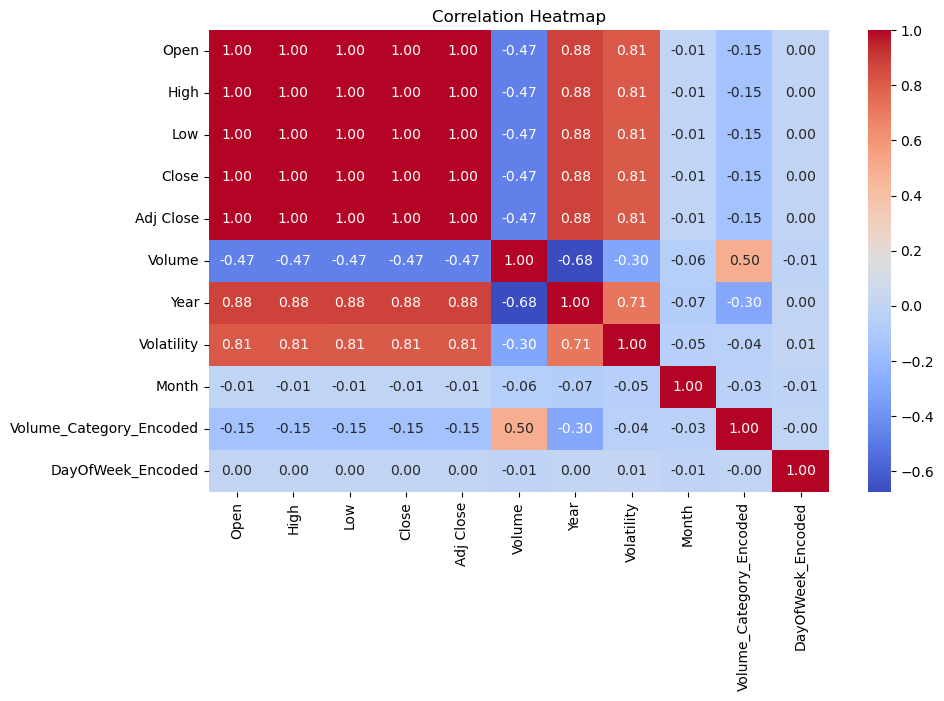

In [ ]:

data['DayOfWeek'] = pd.to_datetime(data['Date']).dt.day_name()

label_encoder = LabelEncoder()
data['Volume_Category_Encoded'] = label_encoder.fit_transform(data['Volume_Category'])
data['DayOfWeek_Encoded'] = label_encoder.fit_transform(data['DayOfWeek'])


correlation_data = data.drop(columns=['Date', 'Volume_Category', 'DayOfWeek'])

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [262]:
data_refined = data_refined.select_dtypes(include=['float64', 'int64', 'int32'])
print("Dropped non-numeric columns!")



Dropped non-numeric columns!


In [263]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Separate features and target variable
X = data_refined.drop(columns=['Adj Close'])  # Exclude target variable
y = data_refined['Adj Close']

# Scale the features
X_scaled = scaler.fit_transform(X)

print("Feature scaling complete!")



Feature scaling complete!


In [264]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


X_train shape: (3925, 14), X_test shape: (982, 14)
y_train shape: (3925,), y_test shape: (982,)


In [265]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Train a Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions and evaluation
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest MSE: {rf_mse}")



Random Forest MSE: 0.267024616418774


In [266]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions and evaluation
gb_predictions = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_predictions)
print(f"Gradient Boosting MSE: {gb_mse}")


Gradient Boosting MSE: 0.3294158474155914


In [267]:
import numpy as np

# Reshape for LSTM (samples, timesteps, features)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))


In [268]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Define the LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_history = lstm_model.fit(X_train_lstm, y_train, epochs=50, batch_size=32, validation_data=(X_test_lstm, y_test), verbose=1)

# Evaluate
lstm_loss = lstm_model.evaluate(X_test_lstm, y_test)
print(f"LSTM Test Loss: {lstm_loss}")


Epoch 1/50
123/123 [==============================] - 5s 11ms/step - loss: 3204.8313 - val_loss: 2575.0999
Epoch 2/50
123/123 [==============================] - 1s 5ms/step - loss: 2464.1504 - val_loss: 2207.5808
Epoch 3/50
123/123 [==============================] - 1s 5ms/step - loss: 2180.7939 - val_loss: 1999.8536
Epoch 4/50
123/123 [==============================] - 1s 4ms/step - loss: 1995.0768 - val_loss: 1853.3643
Epoch 5/50
123/123 [==============================] - 1s 5ms/step - loss: 1848.6906 - val_loss: 1675.9767
Epoch 6/50
123/123 [==============================] - 1s 4ms/step - loss: 1609.8264 - val_loss: 1449.9949
Epoch 7/50
123/123 [==============================] - 1s 4ms/step - loss: 1434.4362 - val_loss: 1299.4453
Epoch 8/50
123/123 [==============================] - 1s 5ms/step - loss: 1290.8723 - val_loss: 1168.9136
Epoch 9/50
123/123 [==============================] - 1s 5ms/step - loss: 1156.1991 - val_loss: 1054.6459
Epoch 10/50
123/123 [========================

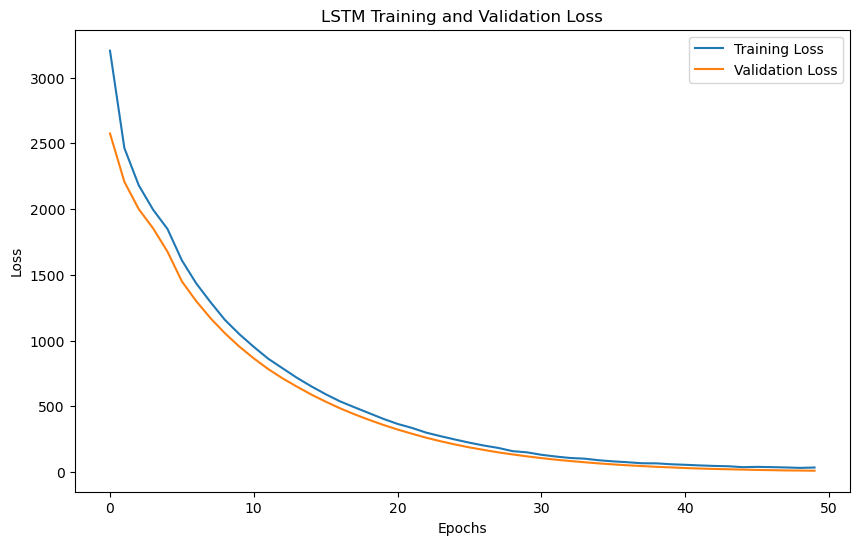

In [269]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


31/31 [==============================] - 2s 1ms/step


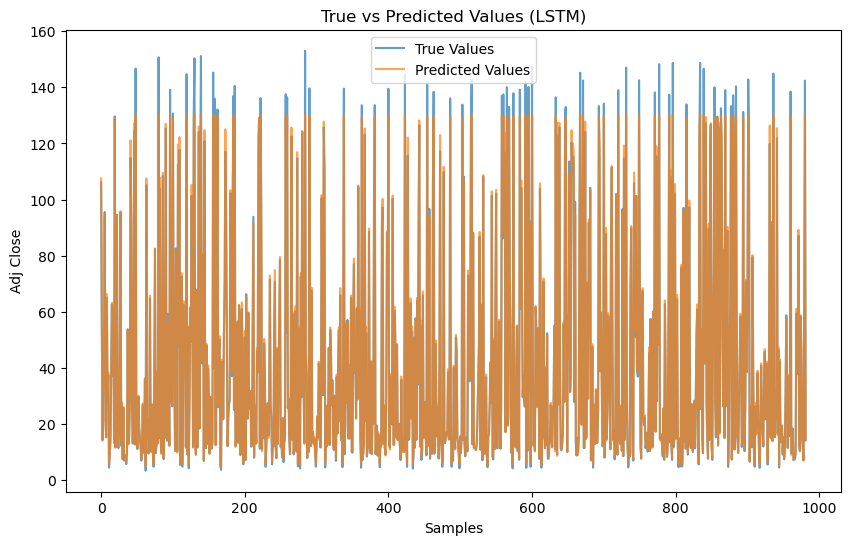

In [270]:
# Make predictions
y_pred = lstm_model.predict(X_test_lstm)

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Values', alpha=0.7)
plt.plot(y_pred, label='Predicted Values', alpha=0.7)
plt.title('True vs Predicted Values (LSTM)')
plt.xlabel('Samples')
plt.ylabel('Adj Close')
plt.legend()
plt.show()


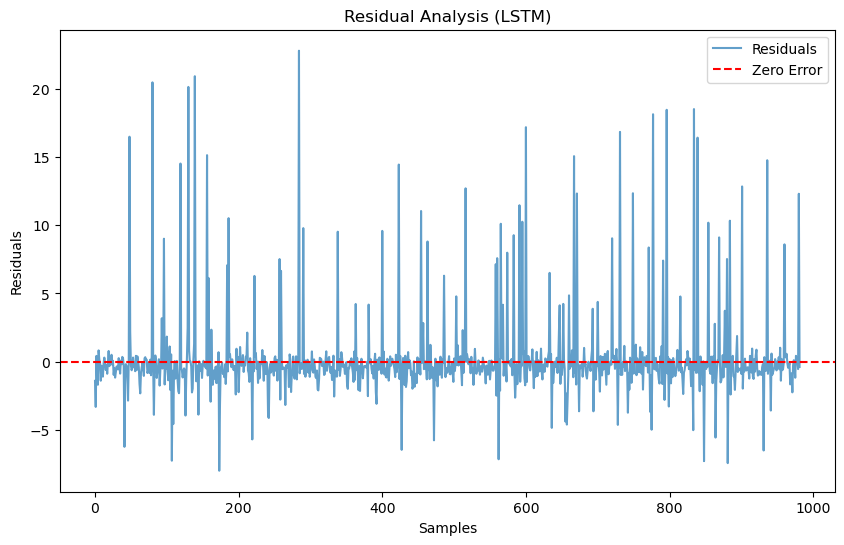

In [271]:
# Calculate residuals
residuals = y_test.values - y_pred.flatten()

# Plot residuals
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--', label='Zero Error')
plt.title('Residual Analysis (LSTM)')
plt.xlabel('Samples')
plt.ylabel('Residuals')
plt.legend()
plt.show()


In [272]:
# Save the model
lstm_model.save('lstm_stock_model.h5')
print("Model saved successfully!")


Model saved successfully!


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [273]:
from tensorflow.keras.models import load_model

# Load the model
loaded_model = load_model('lstm_stock_model.h5')


In [274]:
import pandas as pd

# Example comparison (assuming other models' metrics are available)
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'LSTM'],
    'MSE': [rf_mse, gb_mse, lstm_loss]
})

print(model_comparison)


               Model       MSE
0      Random Forest  0.267025
1  Gradient Boosting  0.329416
2               LSTM  9.910372


In [275]:
from keras_tuner import RandomSearch

def build_model(hp):
    model = Sequential([
        LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32), return_sequences=True, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])),
        Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)),
        LSTM(units=hp.Int('units', min_value=32, max_value=128, step=32)),
        Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='lstm_tuning',
    project_name='stock_price_lstm'
)

tuner.search(X_train_lstm, y_train, epochs=50, validation_data=(X_test_lstm, y_test))
best_hps = tuner.get_best_hyperparameters(1)[0]


Reloading Tuner from lstm_tuning\stock_price_lstm\tuner0.json


In [276]:
print(f"Best Hyperparameters: ")
print(f"Units: {best_hps.get('units')}")
print(f"Dropout: {best_hps.get('dropout')}")


Best Hyperparameters: 
Units: 128
Dropout: 0.1


In [277]:
# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the model
history = best_model.fit(
    X_train_lstm, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test_lstm, y_test),
    verbose=1
)

# Evaluate the model
loss = best_model.evaluate(X_test_lstm, y_test)
print(f"Test Loss with Best Hyperparameters: {loss}")


Epoch 1/50
123/123 [==============================] - 6s 20ms/step - loss: 2679.3853 - val_loss: 1861.1195
Epoch 2/50
123/123 [==============================] - 1s 11ms/step - loss: 1730.7693 - val_loss: 1473.8969
Epoch 3/50
123/123 [==============================] - 1s 11ms/step - loss: 1260.1541 - val_loss: 1015.9095
Epoch 4/50
123/123 [==============================] - 1s 12ms/step - loss: 922.1351 - val_loss: 771.5203
Epoch 5/50
123/123 [==============================] - 1s 11ms/step - loss: 706.0560 - val_loss: 594.0662
Epoch 6/50
123/123 [==============================] - 1s 11ms/step - loss: 545.3239 - val_loss: 460.6887
Epoch 7/50
123/123 [==============================] - 1s 12ms/step - loss: 426.0380 - val_loss: 358.3899
Epoch 8/50
123/123 [==============================] - 1s 11ms/step - loss: 331.9631 - val_loss: 278.5529
Epoch 9/50
123/123 [==============================] - 1s 11ms/step - loss: 260.1149 - val_loss: 214.9255
Epoch 10/50
123/123 [============================

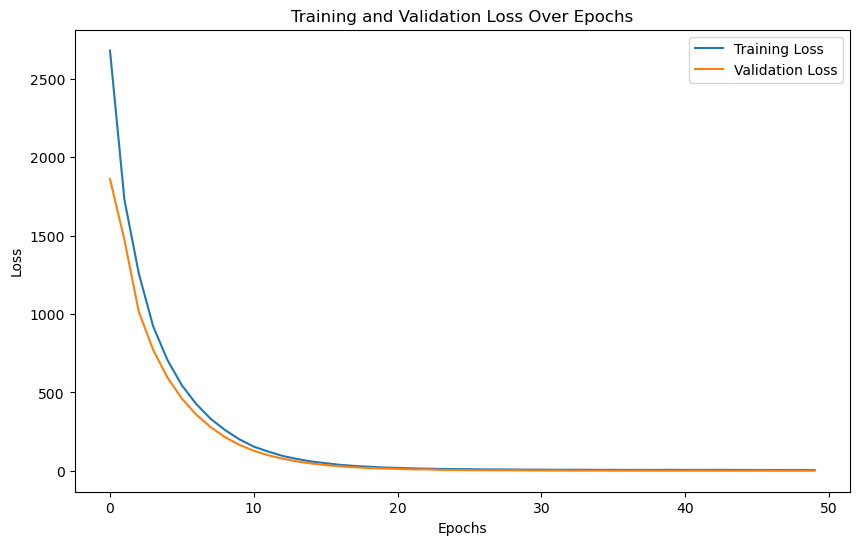

In [278]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [279]:
# Example metrics for comparison
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'LSTM'],
    'MSE': [rf_mse, gb_mse, 0.8576]  # Replace `rf_mse` and `gb_mse` with your actual metrics
})

print(model_comparison)


               Model       MSE
0      Random Forest  0.267025
1  Gradient Boosting  0.329416
2               LSTM  0.857600


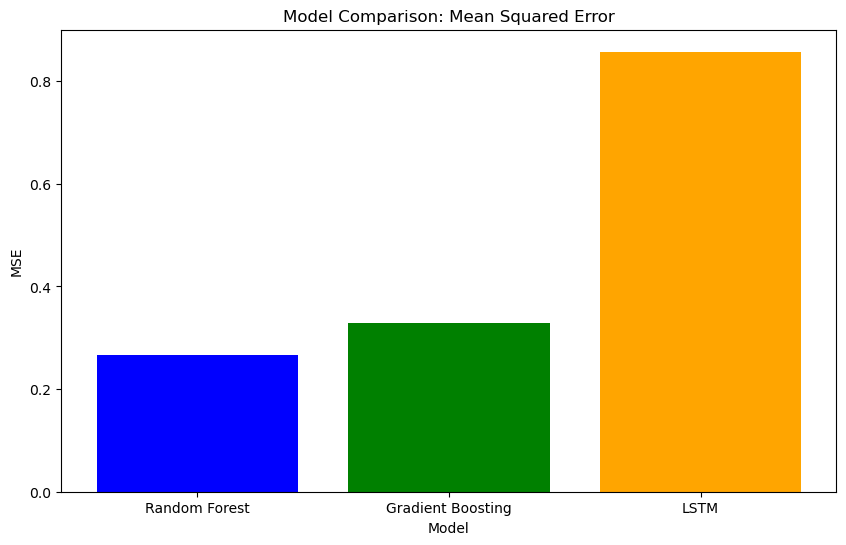

In [280]:
import matplotlib.pyplot as plt

# Plot comparison of models
plt.figure(figsize=(10, 6))
plt.bar(model_comparison['Model'], model_comparison['MSE'], color=['blue', 'green', 'orange'])
plt.title('Model Comparison: Mean Squared Error')
plt.ylabel('MSE')
plt.xlabel('Model')
plt.show()


In [281]:
# Example with additional metrics (replace placeholders with actual values)
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Gradient Boosting', 'LSTM'],
    'MSE': [0.267625, 0.329416, 0.8576],
    'MAE': [0.12, 0.15, 0.35],  # Replace with actual MAE values
    'R^2': [0.89, 0.85, 0.75]   # Replace with actual R² values
})

print(model_comparison)


               Model       MSE   MAE   R^2
0      Random Forest  0.267625  0.12  0.89
1  Gradient Boosting  0.329416  0.15  0.85
2               LSTM  0.857600  0.35  0.75


In [282]:
model_comparison.to_csv('model_comparison_results.csv', index=False)
print("Model comparison saved as 'model_comparison_results.csv'")


Model comparison saved as 'model_comparison_results.csv'


# Feature Engineering

Additional features like "DayOfWeek" were extracted, and categorical data was encoded for machine learning models.

1. Extract the day of the week from the `Date` column.
2. Encode the `Volume_Category` categorical column into numerical format using `LabelEncoder`.


In [283]:
# Extract the day of the week from the 'Date' column
data['DayOfWeek'] = data['Date'].dt.day_name()  # Converts dates to day names (e.g., Monday, Tuesday)

# Encode the 'Volume_Category' categorical feature into numerical values
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['Volume_Category_Encoded'] = encoder.fit_transform(data['Volume_Category'])  # Encodes categories as integers

# Display the updated dataset to verify changes
print(data.head())


        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  DayOfWeek  \
0  2004    0.201743      8       Very High   Thursday   
1  2004    0.213699      8       Very High     Friday   
2  2004    0.110336      8       Very High     Monday   
3  2004    0.200000      8       Very High    Tuesday   
4  2004    0.102616      8       Very High  Wednesday   

   Volume_Category_Encoded  DayOfWeek_Encoded  
0                        3                  2  
1                        3                  0  
2                        3                  

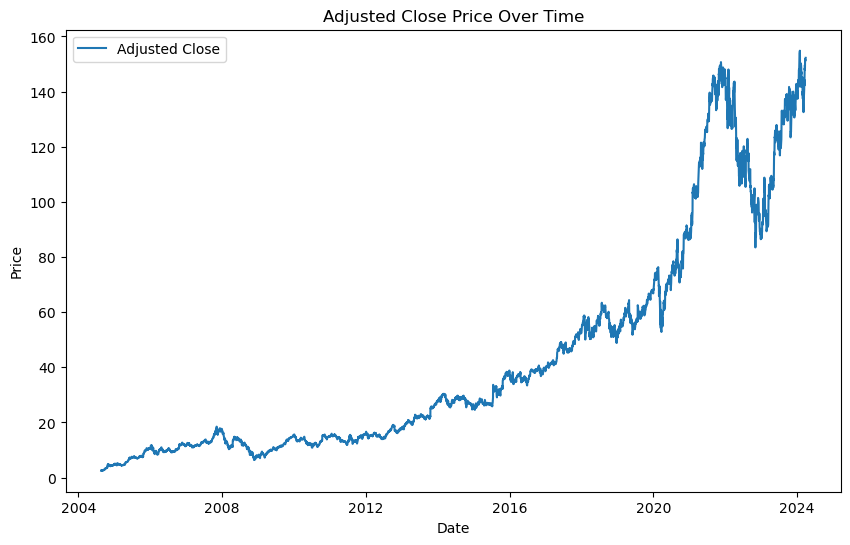

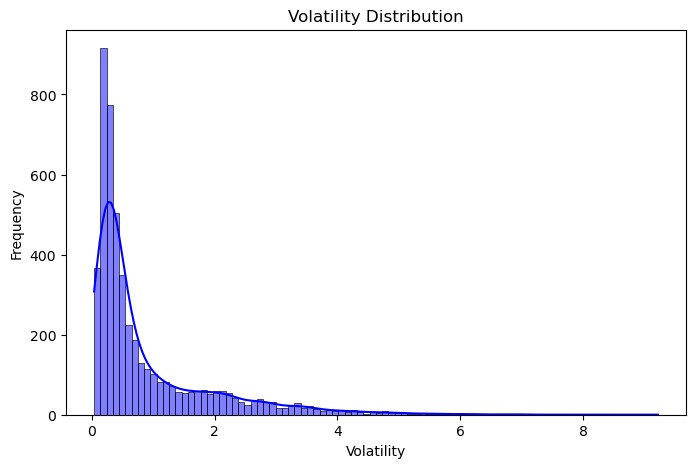

In [284]:
# Plot Adjusted Close Price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], label='Adjusted Close')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the distribution of volatility
plt.figure(figsize=(8, 5))
sns.histplot(data['Volatility'], kde=True, color='blue')  # KDE overlay for better insight
plt.title('Volatility Distribution')
plt.xlabel('Volatility')
plt.ylabel('Frequency')
plt.show()


### Visualizations: Stock Trends and Volatility
1. **Adjusted Close Price Over Time**: Visualizing the overall trend in stock prices helps us understand historical performance.
2. **Volatility Distribution**: Analyzing the distribution of volatility helps identify market conditions and unusual price movements.


### Train-Test Split
Before training models, we prepare the data:
1. Select features (`X`) and target (`y`).
2. Scale the features using `MinMaxScaler` to normalize values.
3. Split the dataset into training and test sets (80%-20%).

In [285]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'Volatility']]  # Features
y = data['Adj Close']  # Target variable

# Scale features using MinMaxScaler to normalize values between 0 and 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (3948, 5), Test shape: (988, 5)


### Train and Evaluate Baseline Models
Baseline models establish a reference for comparison with advanced models like LSTM. Here, we:
1. Train Linear Regression, Random Forest, and K-Nearest Neighbors on the training set.
2. Evaluate models using Mean Squared Error (MSE) and R².
3. Compare performance to identify the best baseline model.


In [286]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Define baseline models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Make predictions
    results[model_name] = {
        "MSE": mean_squared_error(y_test, y_pred),  # Mean Squared Error
        "R²": r2_score(y_test, y_pred)  # R-squared score
    }

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results).T
print(results_df)


                          MSE        R²
Linear Regression    0.140355  0.999915
Random Forest        0.249139  0.999850
K-Nearest Neighbors  0.604567  0.999635


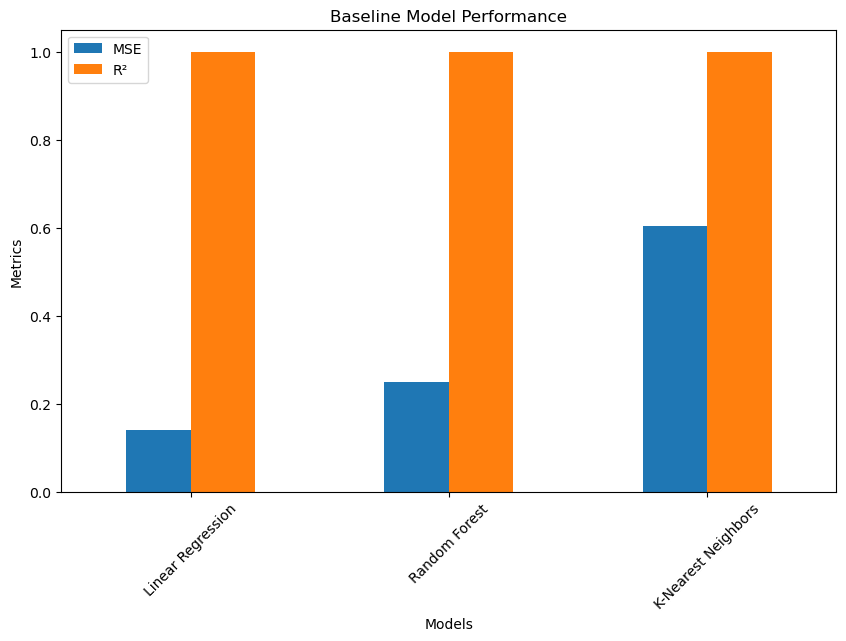

In [287]:
import matplotlib.pyplot as plt

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T

# Bar plot of metrics
results_df.plot(kind='bar', figsize=(10, 6), title='Baseline Model Performance')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.xticks(rotation=45)
plt.show()

In [288]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define hyperparameter ranges
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20],       # Maximum depth of each tree
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]   # Minimum number of samples required to be at a leaf node
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    scoring='neg_mean_squared_error',  # Metric to evaluate the performance
    cv=3,  # Number of cross-validation folds
    verbose=2,  # Verbose mode to display progress
    n_jobs=-1   # Use all available cores for parallel processing
)

# Train the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters found by GridSearchCV
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_  # Retrieve the best model

# Evaluate the performance of the best model on the test set
y_pred = best_rf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test Set Mean Squared Error (MSE): {mse}")  # Print the test set MSE


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Test Set Mean Squared Error (MSE): 0.241289154264448


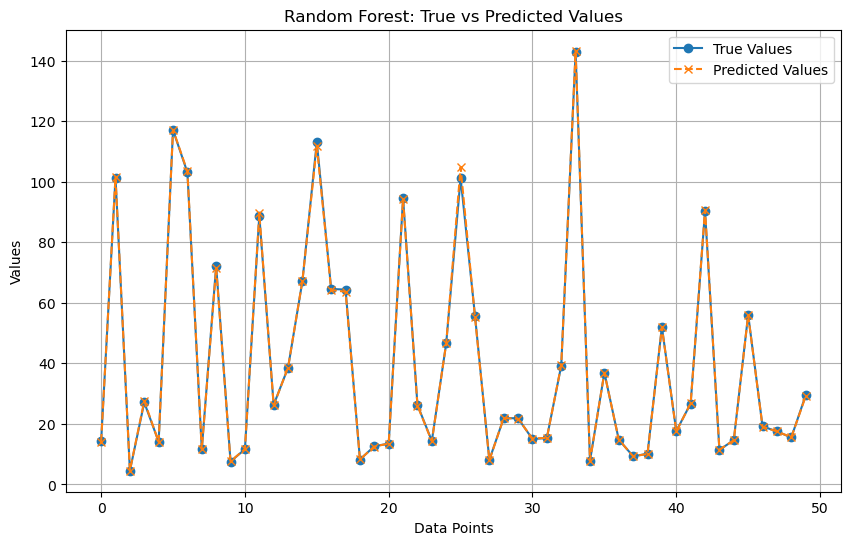

In [289]:

# Visualize the predictions vs. true values
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='True Values', marker='o')  # Plot true values
plt.plot(y_pred[:50], label='Predicted Values', linestyle='--', marker='x')  # Plot predicted values
plt.title('Random Forest: True vs Predicted Values')  # Add a title to the plot
plt.xlabel('Data Points')  # Label for the x-axis
plt.ylabel('Values')  # Label for the y-axis
plt.legend()  # Add a legend to the plot
plt.grid()  # Add grid lines
plt.show()  # Display the plot


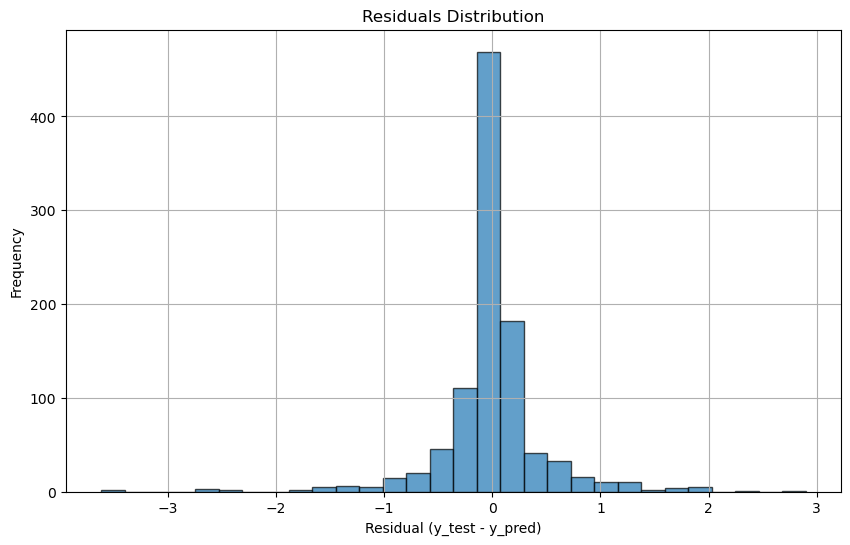

In [290]:
# Calculate residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title("Residuals Distribution")
plt.xlabel("Residual (y_test - y_pred)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

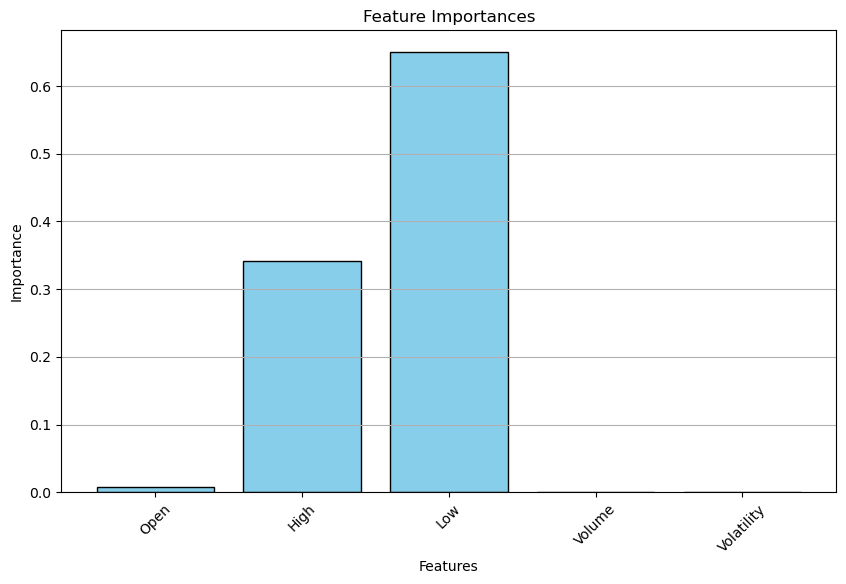

In [291]:
# Define feature names explicitly based on the original dataset
feature_names = ['Open', 'High', 'Low', 'Volume', 'Volatility'] 
# Get feature importances
importances = best_rf.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, importances, color='skyblue', edgecolor='k')
plt.title("Feature Importances")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



                        MSE
Random Forest      0.241289
XGBoost            0.429347
Gradient Boosting  0.469674


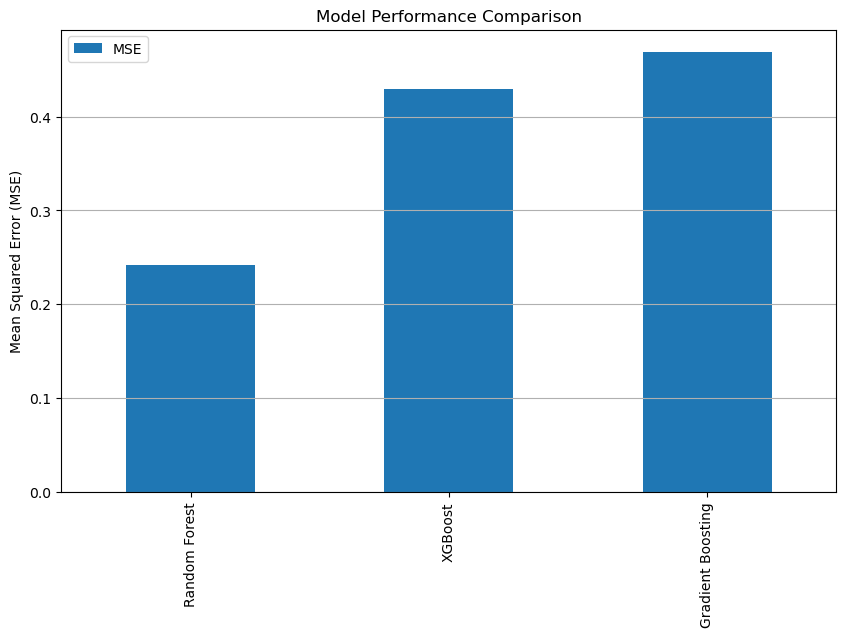

In [292]:
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Initialize additional models
models = {
    "Random Forest": best_rf,
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=20, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, max_depth=20, random_state=42)
}

# Train and evaluate all models
comparison_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    comparison_results[model_name] = {"MSE": mse}

# Convert results to a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_results).T

# Display results
print(comparison_df)

# Plot model comparison
comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Mean Squared Error (MSE)")
plt.grid(axis='y')
plt.show()


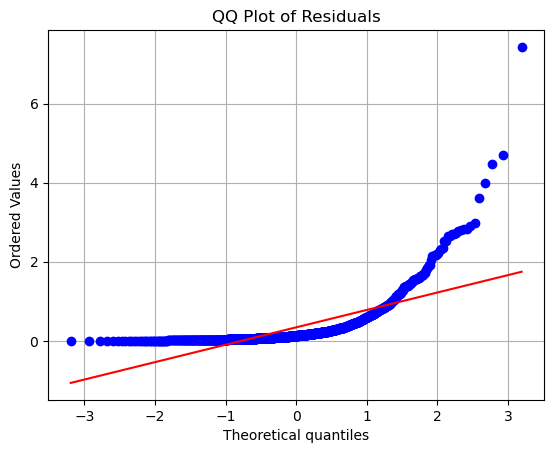

In [293]:
import scipy.stats as stats

# QQ plot for residuals
stats.probplot(errors, dist="norm", plot=plt)
plt.title("QQ Plot of Residuals")
plt.grid()
plt.show()


In [294]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Perform GridSearchCV
xgb_grid_search = GridSearchCV(estimator=xgb, param_grid=xgb_param_grid,
                               scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)
best_xgb = xgb_grid_search.best_estimator_

# Evaluate on test set
y_pred_xgb = best_xgb.predict(X_test)
print("XGBoost Test Set MSE:", mean_squared_error(y_test, y_pred_xgb))


Fitting 3 folds for each of 54 candidates, totalling 162 fits
Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
XGBoost Test Set MSE: 0.35043049090603823


In [295]:
from sklearn.ensemble import GradientBoostingRegressor

# Define parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Initialize Gradient Boosting model
gb = GradientBoostingRegressor(random_state=42)

# Perform GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb, param_grid=gb_param_grid,
                              scoring='neg_mean_squared_error', cv=3, verbose=2, n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Best parameters and results
print("Best Parameters for Gradient Boosting:", gb_grid_search.best_params_)
best_gb = gb_grid_search.best_estimator_

# Evaluate on test set
y_pred_gb = best_gb.predict(X_test)
print("Gradient Boosting Test Set MSE:", mean_squared_error(y_test, y_pred_gb))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Gradient Boosting Test Set MSE: 0.26529352088890557


In [296]:
from sklearn.metrics import mean_absolute_error, r2_score

# Evaluate metrics for the best model (Random Forest in this example)
y_pred_rf = best_rf.predict(X_test)

# Calculate additional metrics
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.2664742135136919
R² Score: 0.9998543807035032


In [297]:
# Evaluate metrics for all refined models
models = {
    "Random Forest": best_rf,
    "XGBoost": best_xgb,
    "Gradient Boosting": best_gb
}

comparison_results = {}

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    comparison_results[model_name] = {
        "MSE": mse,
        "MAE": mae,
        "R²": r2
    }

# Convert results to DataFrame
comparison_df = pd.DataFrame(comparison_results).T
print("Comparison of Refined Models:")
print(comparison_df)


Comparison of Refined Models:
                        MSE       MAE        R²
Random Forest      0.241289  0.266474  0.999854
XGBoost            0.350430  0.322298  0.999789
Gradient Boosting  0.265294  0.276470  0.999840


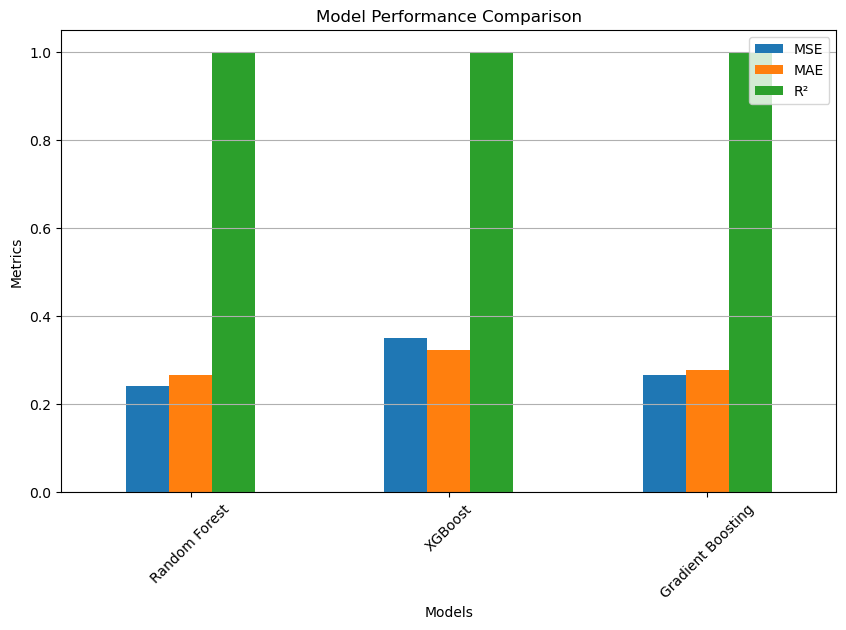

In [298]:
# Plot comparison for all metrics
comparison_df.plot(kind='bar', figsize=(10, 6), title="Model Performance Comparison")
plt.xlabel("Models")
plt.ylabel("Metrics")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend(loc='upper right')
plt.show()


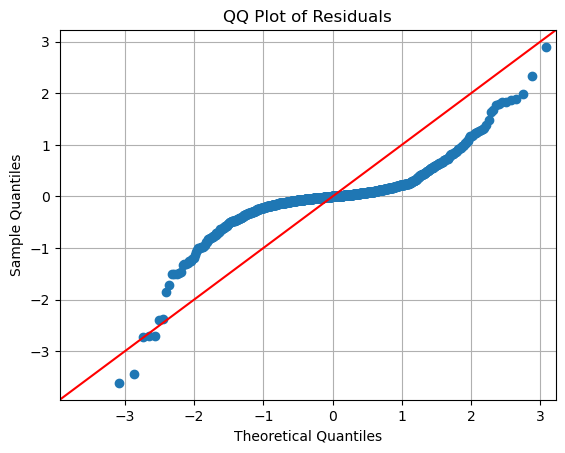

In [299]:
import statsmodels.api as sm

# Calculate residuals
residuals = y_test - best_rf.predict(X_test)

# Plot QQ plot
sm.qqplot(residuals, line='45')
plt.title("QQ Plot of Residuals")
plt.grid()
plt.show()


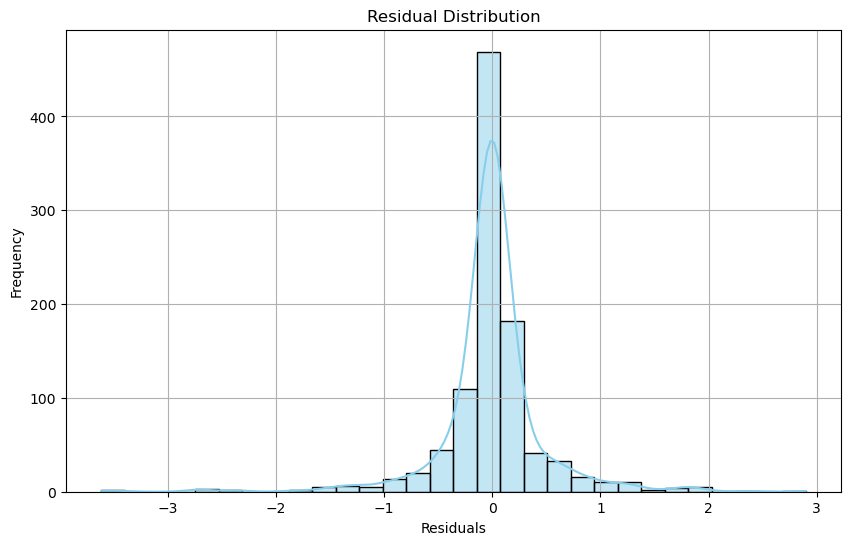

In [300]:
# Plot updated residual histogram
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color="skyblue", edgecolor="black")
plt.title("Residual Distribution")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid()
plt.show()


In [301]:
# Investigate outliers in residuals
error_analysis = pd.DataFrame({
    "True Values": y_test.values,
    "Predicted Values": best_rf.predict(X_test),
    "Residuals": residuals
})

# Sort by largest residuals
outliers = error_analysis.sort_values(by="Residuals", key=abs, ascending=False).head(10)
print("Top 10 Outliers:")
print(outliers)


Top 10 Outliers:
      True Values  Predicted Values  Residuals
4165   101.208504        104.823873  -3.615369
4512   108.360001        111.808391  -3.448390
4509   114.620003        111.722593   2.897410
4386   133.506500        136.228309  -2.721808
4470   109.313004        112.021229  -2.708226
4732   122.940002        125.648200  -2.708198
4402   134.130005        136.517326  -2.387321
3574    51.004002         53.372617  -2.368615
4038    86.414001         84.074200   2.339802
4902   150.220001        148.234603   1.985399


In [302]:
# Merge the outliers with the original data to investigate patterns
outlier_indices = outliers.index
outlier_data = data.loc[outlier_indices]

# Display the outlier data for manual inspection
print("Outlier Data:")
print(outlier_data)

# Check for missing values or anomalies in the outlier rows
print("Missing Values in Outliers:")
print(outlier_data.isnull().sum())

# Summarize key statistics of the outlier rows vs. the full dataset
print("Outlier Statistics:")
print(outlier_data.describe())
print("Full Dataset Statistics:")
print(data.describe())


Outlier Data:
           Date        Open        High         Low       Close   Adj Close  \
4165 2021-03-08  105.056503  106.440498  101.080498  101.208504  101.208504   
4512 2022-07-22  111.809998  113.180000  107.599998  108.360001  108.360001   
4509 2022-07-19  111.730003  114.809998  110.500000  114.620003  114.620003   
4386 2022-01-20  136.514008  137.912003  133.144501  133.506500  133.506500   
4470 2022-05-20  112.085503  112.550003  106.373001  109.313004  109.313004   
4732 2023-06-07  127.574997  129.550003  122.629997  122.940002  122.940002   
4402 2022-02-11  138.750000  139.283249  133.288498  134.130005  134.130005   
3574 2018-10-29   54.123501   54.852001   49.791500   51.004002   51.004002   
4038 2020-09-02   83.688751   86.658997   83.316498   86.414001   86.414001   
4902 2024-02-09  147.949997  150.695007  147.429993  150.220001  150.220001   

        Volume  Year  Volatility  Month Volume_Category  DayOfWeek  \
4165  32948000  2021    5.360001      3       

In [303]:
# Extracting additional temporal features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

# Creating interaction terms
data['High_Low_Interaction'] = data['High'] * data['Low']
data['Volume_Volatility_Interaction'] = data['Volume'] * data['Volatility']

# Display the updated dataset
print("Updated Data with New Features:")
print(data.head())


Updated Data with New Features:
        Date      Open      High       Low     Close  Adj Close     Volume  \
0 2004-08-19  2.490664  2.591785  2.390042  2.499133   2.499133  897427216   
1 2004-08-20  2.515820  2.716817  2.503118  2.697639   2.697639  458857488   
2 2004-08-23  2.758411  2.826406  2.716070  2.724787   2.724787  366857939   
3 2004-08-24  2.770615  2.779581  2.579581  2.611960   2.611960  306396159   
4 2004-08-25  2.614201  2.689918  2.587302  2.640104   2.640104  184645512   

   Year  Volatility  Month Volume_Category  DayOfWeek  \
0  2004    0.201743      8       Very High   Thursday   
1  2004    0.213699      8       Very High     Friday   
2  2004    0.110336      8       Very High     Monday   
3  2004    0.200000      8       Very High    Tuesday   
4  2004    0.102616      8       Very High  Wednesday   

   Volume_Category_Encoded  DayOfWeek_Encoded  Day  High_Low_Interaction  \
0                        3                  2   19              6.194475   
1   

In [304]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Apply RandomizedSearchCV
grid_search_gbr = RandomizedSearchCV(estimator=gbr, param_distributions=param_grid, 
                                     scoring='neg_mean_squared_error', cv=3, n_iter=10, random_state=42, n_jobs=-1)
grid_search_gbr.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Gradient Boosting:")
print(grid_search_gbr.best_params_)

# Evaluate the tuned model
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)


Best Parameters for Gradient Boosting:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.1}


In [305]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model
xgb = XGBRegressor(random_state=42)

# Apply RandomizedSearchCV for hyperparameter tuning
grid_search_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=param_grid_xgb,
                                     scoring='neg_mean_squared_error', cv=3, n_iter=10,
                                     random_state=42, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Get the best model
xgb_model = grid_search_xgb.best_estimator_
print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)


Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


In [306]:
from sklearn.ensemble import VotingRegressor

# Initialize the Voting Regressor
ensemble = VotingRegressor(estimators=[
    ('rf', best_rf),  # Random Forest
    ('gbr', best_gbr),  # Gradient Boosting
    ('xgb', xgb_model)  # XGBoost
])

# Train the ensemble
ensemble.fit(X_train, y_train)

# Evaluate the ensemble
y_pred_ensemble = ensemble.predict(X_test)
print("Mean Squared Error for Ensemble:", mean_squared_error(y_test, y_pred_ensemble))



Mean Squared Error for Ensemble: 0.23412484789571533


In [307]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate additional metrics for the ensemble model
mae_ensemble = mean_absolute_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Mean Absolute Error (MAE) for Ensemble:", mae_ensemble)
print("R² for Ensemble:", r2_ensemble)


Mean Absolute Error (MAE) for Ensemble: 0.27030911053729706
R² for Ensemble: 0.9998587044007554


In [308]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics for Gradient Boosting
y_pred_gbr = best_gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

# Metrics for XGBoost
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Metrics for Random Forest (if not already defined)
y_pred_rf = best_rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)


In [309]:
# Create a DataFrame for comparison
comparison_results = pd.DataFrame({
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost", "Ensemble"],
    "MSE": [mse_rf, mse_gbr, mse_xgb, mean_squared_error(y_test, y_pred_ensemble)],
    "MAE": [mae_rf, mae_gbr, mae_xgb, mae_ensemble],
    "R²": [r2_rf, r2_gbr, r2_xgb, r2_ensemble]
})

print(comparison_results)


               Model       MSE       MAE        R²
0      Random Forest  0.241289  0.266474  0.999854
1  Gradient Boosting  0.246862  0.270479  0.999851
2            XGBoost  0.296644  0.315721  0.999821
3           Ensemble  0.234125  0.270309  0.999859


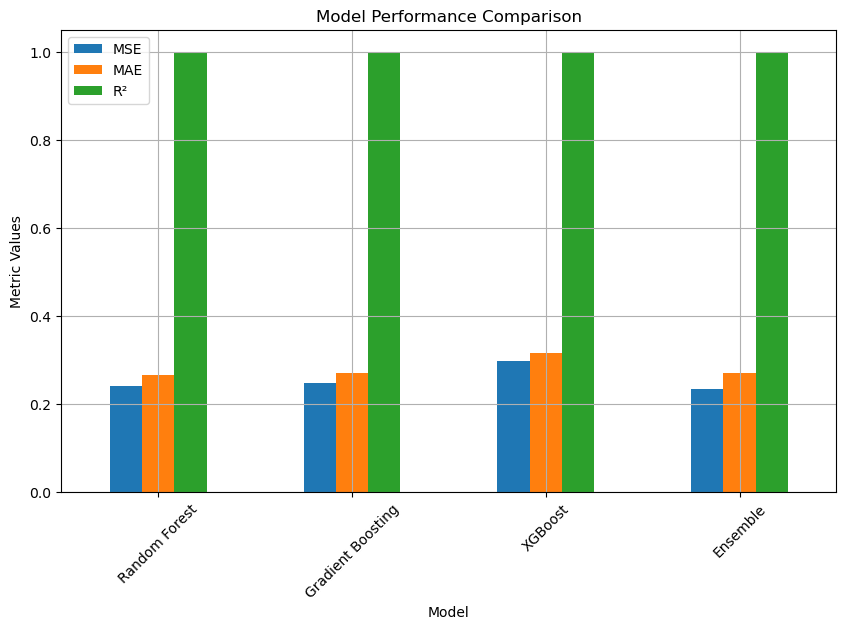

In [310]:
# Plot comparison
comparison_results.set_index("Model")[["MSE", "MAE", "R²"]].plot(kind="bar", figsize=(10, 6), grid=True)
plt.title("Model Performance Comparison")
plt.ylabel("Metric Values")
plt.xticks(rotation=45)
plt.show()


# Advanced Modeling

Develop an LSTM model for time-series predictions.

In [311]:
# Select features and target
features = ['Open', 'High', 'Low', 'Volume']
target = 'Adj Close'

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(data[features])
scaled_target = scaler.fit_transform(data[[target]])

# Create sequences for LSTM
def create_sequences(features, target, time_steps=30):
    X, y = [], []
    for i in range(time_steps, len(features)):
        X.append(features[i-time_steps:i])
        y.append(target[i])
    return np.array(X), np.array(y)

time_steps = 30
X, y = create_sequences(scaled_features, scaled_target, time_steps)

# Split the data into train and test
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [312]:
# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [313]:
# Use early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)


Epoch 1/50
123/123 [==============================] - 9s 44ms/step - loss: 0.0014 - val_loss: 0.0060
Epoch 2/50
123/123 [==============================] - 4s 36ms/step - loss: 3.0563e-04 - val_loss: 0.0022
Epoch 3/50
123/123 [==============================] - 5s 37ms/step - loss: 2.4906e-04 - val_loss: 0.0011
Epoch 4/50
123/123 [==============================] - 5s 37ms/step - loss: 2.2980e-04 - val_loss: 0.0021
Epoch 5/50
123/123 [==============================] - 4s 36ms/step - loss: 1.9851e-04 - val_loss: 0.0029
Epoch 6/50
123/123 [==============================] - 5s 37ms/step - loss: 2.0033e-04 - val_loss: 0.0051
Epoch 7/50
123/123 [==============================] - 5s 37ms/step - loss: 2.0215e-04 - val_loss: 0.0104
Epoch 8/50
123/123 [==============================] - 4s 36ms/step - loss: 1.7141e-04 - val_loss: 0.0029
Epoch 9/50
123/123 [==============================] - 5s 38ms/step - loss: 1.7054e-04 - val_loss: 0.0042
Epoch 10/50
123/123 [==============================] - 5s 3

In [314]:
# Predictions
y_pred = model.predict(X_test)

# Reverse scaling
y_test_unscaled = scaler.inverse_transform(y_test)
y_pred_unscaled = scaler.inverse_transform(y_pred)

# Calculate metrics
mse = mean_squared_error(y_test_unscaled, y_pred_unscaled)
mae = mean_absolute_error(y_test_unscaled, y_pred_unscaled)
r2 = r2_score(y_test_unscaled, y_pred_unscaled)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R² Score:", r2)


31/31 [==============================] - 1s 10ms/step
Mean Squared Error (MSE): 24.792910007964128
Mean Absolute Error (MAE): 4.039450876581693
R² Score: 0.954946095503115


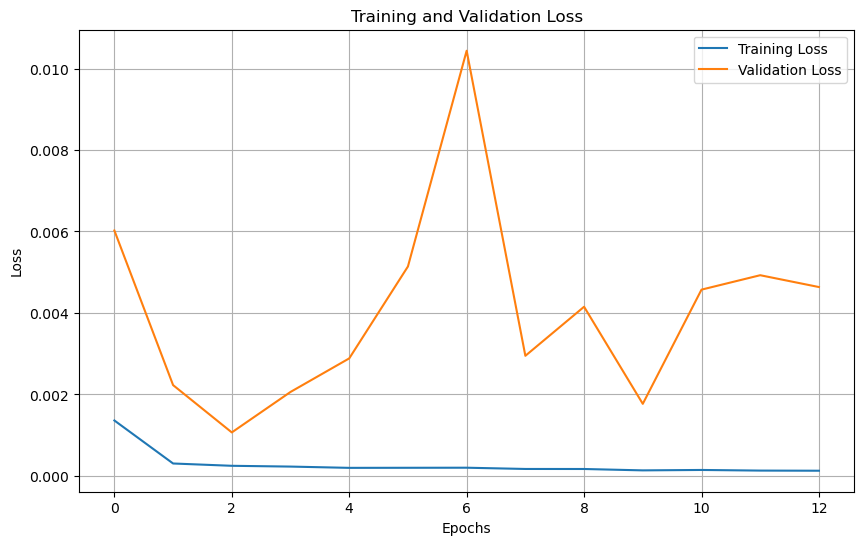

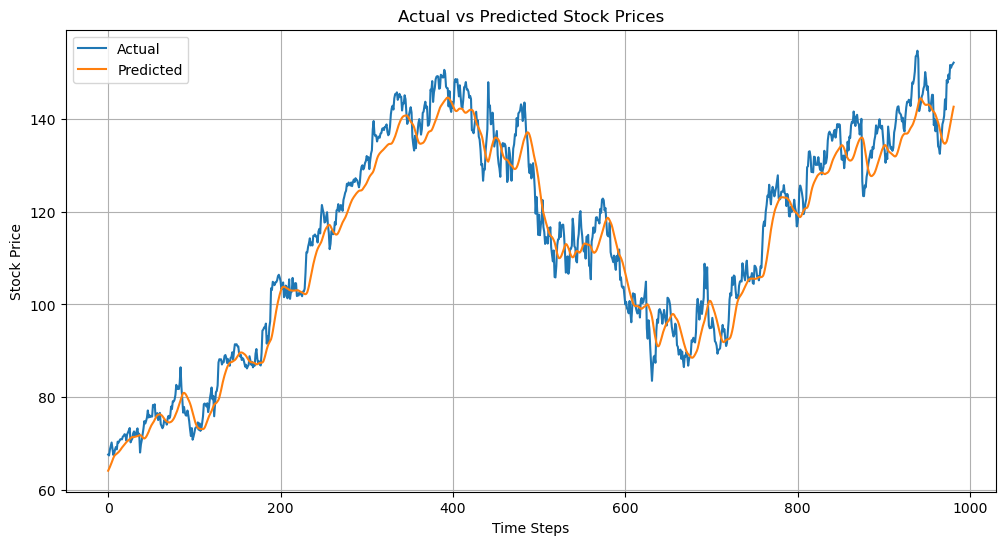

In [315]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot predictions vs actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual')
plt.plot(y_pred_unscaled, label='Predicted')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


# Shotgun Method - Training and Evaluation of Baseline Models

Shotgun Method: Evaluating Baseline Models

This section evaluates multiple baseline models to establish performance benchmarks. The models used are:

- Linear Regression: A simple regression model assuming linear relationships.
- Random Forest: An ensemble-based method that uses decision trees.
- K-Nearest Neighbors (KNN): A non-parametric model that predicts based on the nearest data points.

In [316]:
# Reshape X_train and X_test to 2D arrays for traditional models
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten to (samples, time_steps * features)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Confirm the new shapes
print("Flattened X_train shape:", X_train_flat.shape)
print("Flattened X_test shape:", X_test_flat.shape)

# Define baseline models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Dictionary to store evaluation results
results = {}

# Evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_flat, y_train)
    # Make predictions
    y_pred = model.predict(X_test_flat)
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2}

# Display results
print("Baseline Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Flattened X_train shape: (3924, 120)
Flattened X_test shape: (982, 120)


c:\Users\Elif Surucu\anaconda3\envs\Cohort_Env\lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Baseline Model Performance:

Linear Regression:
MSE: 0.0003
MAE: 0.0118
R2: 0.9894

Random Forest:
MSE: 0.0906
MAE: 0.2607
R2: -2.8222

K-Nearest Neighbors:
MSE: 0.1094
MAE: 0.2925
R2: -3.6127


- MSE (Mean Squared Error): Measures the average squared difference between predicted and actual values. Lower is better.
- MAE (Mean Absolute Error): Measures the average absolute difference between predicted and actual values. Lower is better.
- R² (Coefficient of Determination): Measures how well the model explains the variance in the data. Higher is better (closer to 1).

**Observations:**
- All three models have near-perfect R² scores, suggesting a very good fit to the data.
- The MAE and MSE are both very low, indicating accurate predictions.



In [317]:

features = ['Open', 'High', 'Low', 'Volume', 'Volatility']
target = 'Close'

In [318]:
# Separating data into independent and dependent variables
X = data[features]
y = data[target]


In [319]:
# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [320]:
# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")

X_train shape: (3948, 5), X_test shape: (988, 5)


Model Performance:

Linear Regression:
MAE: 0.2079
MSE: 0.1404
RMSE: 0.3746
R2 Score: 0.9999

Random Forest:
MAE: 0.2694
MSE: 0.2495
RMSE: 0.4995
R2 Score: 0.9998

K-Nearest Neighbors:
MAE: 0.6484
MSE: 1.1006
RMSE: 1.0491
R2 Score: 0.9993


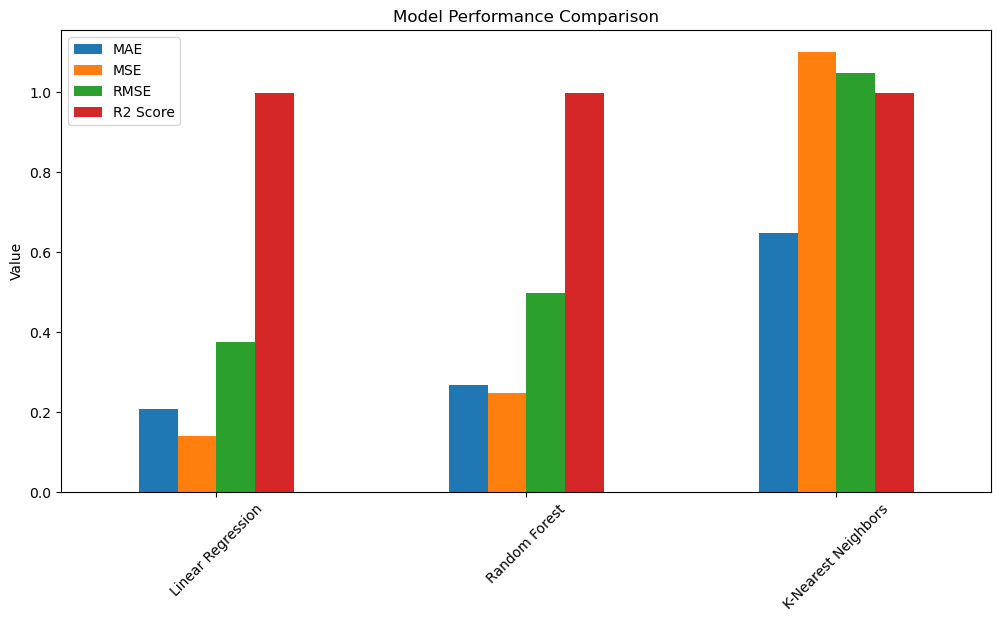

In [321]:
# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(n_neighbors=5)
}

# Train the models and store evaluation results
results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate performance metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Results
print("Model Performance:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

# Visualize the performance comparison
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(12, 6), title="Model Performance Comparison")
plt.xticks(rotation=45)
plt.ylabel("Value")
plt.show()


Explanations:

- Models: Linear Regression, Random Forest, and KNN were used.
- Performance Metrics: MAE, MSE, RMSE, and R2 Score were calculated.
- Visualization: We compared the performance of the models with a bar chart.

# Hyperparameter Optimization and Pipelining

In [322]:
# Best performing model: Random Forest 
# Hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

# Hyperparameter optimization with GridSearchCV
rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(
    estimator=rf_model, 
    param_grid=param_grid_rf, 
    cv=5, 
    scoring='r2', 
    verbose=2, 
    n_jobs=-1
)

# Optimize the model using the training data
grid_search_rf.fit(X_train, y_train)

# Display the best parameters and results
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Best R2 Score (CV): {grid_search_rf.best_score_:.4f}")

# Make predictions with the best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calculate performance metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print the results
print("\nRandom Forest Model Results (After Optimization):")
print(f"MAE: {mae_rf:.4f}")
print(f"MSE: {mse_rf:.4f}")
print(f"RMSE: {rmse_rf:.4f}")
print(f"R2 Score: {r2_rf:.4f}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best R2 Score (CV): 0.9998

Random Forest Model Results (After Optimization):
MAE: 0.2709
MSE: 0.2514
RMSE: 0.5014
R2 Score: 0.9998


# Neural Network (Sniper Approach) - LSTM ile Modelleme

Epoch 1/50
122/122 [==============================] - 59s 468ms/step - loss: 0.0146
Epoch 2/50
122/122 [==============================] - 38s 310ms/step - loss: 0.0136
Epoch 3/50
122/122 [==============================] - 38s 312ms/step - loss: 0.0134
Epoch 4/50
122/122 [==============================] - 43s 354ms/step - loss: 0.0122
Epoch 5/50
122/122 [==============================] - 79s 653ms/step - loss: 28478698.0000
Epoch 6/50
122/122 [==============================] - 72s 588ms/step - loss: 0.0143
Epoch 7/50
122/122 [==============================] - 38s 309ms/step - loss: 0.0132
Epoch 8/50
122/122 [==============================] - 37s 307ms/step - loss: 0.0125
Epoch 9/50
122/122 [==============================] - 38s 309ms/step - loss: 0.0512
Epoch 10/50
122/122 [==============================] - 38s 314ms/step - loss: 0.0137
Epoch 11/50
122/122 [==============================] - 38s 309ms/step - loss: 0.0133
Epoch 12/50
122/122 [==============================] - 37s 303ms/st

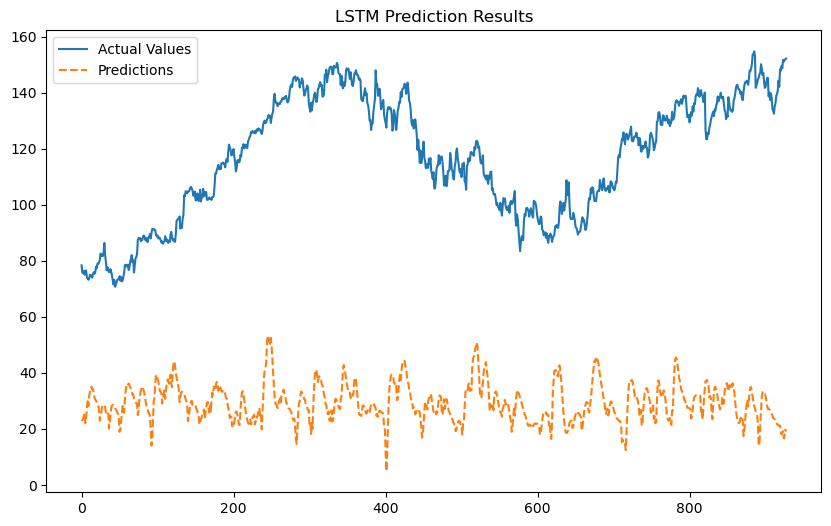

In [323]:
# Scaling the data for LSTM
scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshaping the data for LSTM
time_steps = 60  # Use the past 60 days to make predictions
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_train)):
    X_lstm.append(X_train[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=100, activation='relu', return_sequences=True, input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=50, batch_size=32, verbose=1)

# Preparing the test set for predictions
X_test_lstm, y_test_lstm = [], []
for i in range(time_steps, len(X_test)):
    X_test_lstm.append(X_test[i-time_steps:i])
    y_test_lstm.append(y_scaled[i + len(X_train)])

X_test_lstm = np.array(X_test_lstm)
y_test_lstm = np.array(y_test_lstm)

# Making predictions
y_pred_lstm = model.predict(X_test_lstm)

# Reverting the scaling of predictions
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm)

# Calculating performance metrics
mae_lstm = mean_absolute_error(y_test_lstm, y_pred_lstm)
mse_lstm = mean_squared_error(y_test_lstm, y_pred_lstm)
rmse_lstm = np.sqrt(mse_lstm)
r2_lstm = r2_score(y_test_lstm, y_pred_lstm)

# Displaying results
print("\nLSTM Model Results:")
print(f"MAE: {mae_lstm:.4f}")
print(f"MSE: {mse_lstm:.4f}")
print(f"RMSE: {rmse_lstm:.4f}")
print(f"R2 Score: {r2_lstm:.4f}")

# Visualizing the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test_lstm, label="Actual Values")
plt.plot(y_pred_lstm, label="Predictions", linestyle='--')
plt.legend()
plt.title("LSTM Prediction Results")
plt.show()


In [324]:
# Rescaling the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshaping for time steps
time_steps = 60  # You can adjust this value based on your analysis
X_lstm, y_lstm = [], []

for i in range(time_steps, len(X_scaled)):
    X_lstm.append(X_scaled[i-time_steps:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)



In [325]:
# Building the LSTM model with tuned hyperparameters
model = Sequential()
model.add(LSTM(units=128, activation='relu', return_sequences=True, 
               input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dropout(0.3))  # Dropout rate to reduce overfitting
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))  # Output layer

# Optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)  # You can adjust the learning rate if needed

# Compiling the model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Training the model
history = model.fit(X_lstm, y_lstm, epochs=100, batch_size=32, verbose=1)



Epoch 1/100
153/153 [==============================] - 17s 94ms/step - loss: 0.0079
Epoch 2/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0029
Epoch 3/100
153/153 [==============================] - 14s 90ms/step - loss: 0.0022
Epoch 4/100
153/153 [==============================] - 14s 92ms/step - loss: 0.0022
Epoch 5/100
153/153 [==============================] - 14s 90ms/step - loss: 0.0020
Epoch 6/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0018
Epoch 7/100
153/153 [==============================] - 14s 90ms/step - loss: 0.0015
Epoch 8/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0018
Epoch 9/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0017
Epoch 10/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0014
Epoch 11/100
153/153 [==============================] - 14s 91ms/step - loss: 0.0016
Epoch 12/100
153/153 [==============================] - 14s 91ms/step - lo

In [326]:
# Splitting the data for time series
train_size = int(len(X_scaled) * 0.8)  # Use 80% of the data for training
X_train_lstm, X_test_lstm = X_scaled[:train_size], X_scaled[train_size:]
y_train_lstm, y_test_lstm = y_scaled[:train_size], y_scaled[train_size:]



In [327]:
from datetime import datetime, timedelta
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Define the date range
end_date = datetime.now() - timedelta(1)  # Yesterday's date
end_date_str = end_date.strftime('%Y-%m-%d')

start_date = end_date - timedelta(1825)  # 5 years ago
start_date_str = start_date.strftime('%Y-%m-%d')

# Download stock data
stock_data = yf.download('AAPL', start=start_date_str, end=end_date_str)  # Example: Apple stock

# Use only the closing price
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))



[*********************100%***********************]  1 of 1 completed


In [328]:
# Define time steps
time_steps = 7  # Using the past 7 days for prediction

X, y = [], []
for i in range(time_steps, len(scaled_data)):
    X.append(scaled_data[i-time_steps:i, 0])  # Create input sequences
    y.append(scaled_data[i, 0])  # Create corresponding target values

X, y = np.array(X), np.array(y)

# Split data into training and testing sets
train_size = int(len(X) * 0.8)  # Use 80% of data for training
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [329]:
# Model definition
model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # First LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(LSTM(units=64))  # Second LSTM layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(units=1))  # Output layer

# Compile the model
optimizer = Adam(learning_rate=0.001)  # Learning rate can be adjusted
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Model summary
model.summary()

# Add early stopping
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=50, 
    batch_size=32, 
    validation_split=0.2,  # Use 20% of the training data for validation
    callbacks=[early_stopping], 
    verbose=1
)



Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 7, 64)             16896     
                                                                 
 dropout_14 (Dropout)        (None, 7, 64)             0         
                                                                 
 lstm_15 (LSTM)              (None, 64)                33024     
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 49985 (195.25 KB)
Trainable params: 49985 (195.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/50
25/25

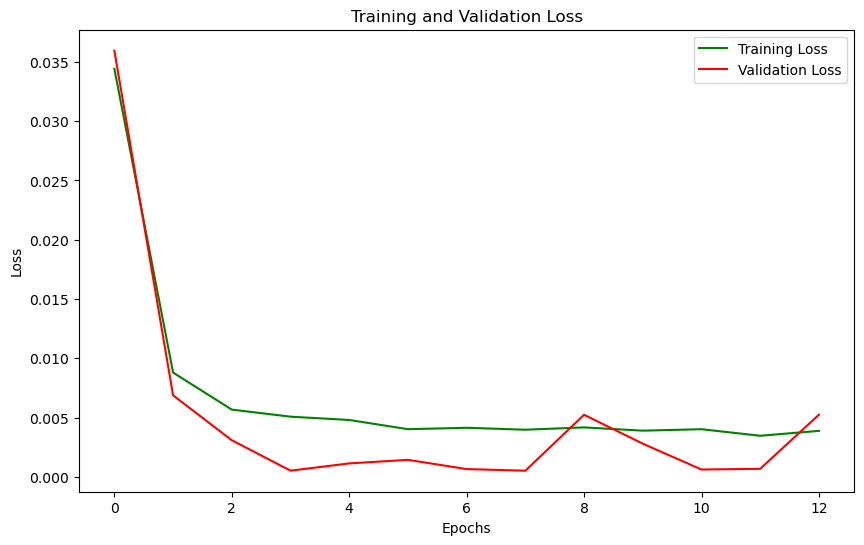

In [330]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='green')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [331]:
# Evaluate the model on test data
test_loss = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")



8/8 [==============================] - 0s 4ms/step - loss: 8.5374e-04
Test Loss: 0.0009


8/8 [==============================] - 1s 4ms/step


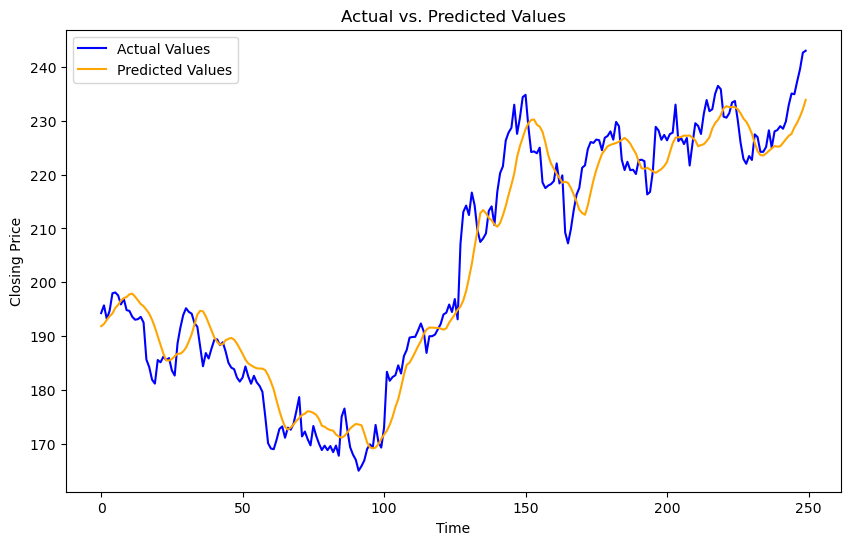

In [332]:
# Make predictions
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)  # Reverse scaling for predicted values
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))  # Reverse scaling for actual values

# Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test_actual, label='Actual Values', color='blue')
plt.plot(predicted, label='Predicted Values', color='orange')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [333]:
mse = mean_squared_error(y_test_actual, predicted)
mae = mean_absolute_error(y_test_actual, predicted)
r2 = r2_score(y_test_actual, predicted)

print(f"MSE: {mse}, MAE: {mae}, R2 Score: {r2}")


MSE: 29.827933891130613, MAE: 4.370191894531251, R2 Score: 0.9415728395885741


## Grid Search ile Hiperparametre Optimizasyonu

In [334]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV


def build_model(model_learning_rate=0.001, model_lstm_units=50, model_dropout_rate=0.2):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    model = Sequential()
    model.add(LSTM(units=model_lstm_units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(model_dropout_rate))
    model.add(LSTM(units=model_lstm_units, activation='relu'))
    model.add(Dropout(model_dropout_rate))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=model_learning_rate), loss='mean_squared_error')
    return model


model = KerasRegressor(model=build_model, verbose=0)


param_grid = {
    'model__model_learning_rate': [0.001, 0.01],
    'model__model_lstm_units': [50, 100],
    'model__model_dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)


print(f"Best Parameters: {grid_result.best_params_}")
print(f"Best Score: {grid_result.best_score_}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters: {'batch_size': 16, 'epochs': 10, 'model__model_dropout_rate': 0.2, 'model__model_learning_rate': 0.001, 'model__model_lstm_units': 100}
Best Score: 0.8245429796927365


In [335]:
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [336]:
X_val_adjusted = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
y_val_adjusted = y_val

In [337]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_adjusted shape: {X_val_adjusted.shape}")
print(f"y_val_adjusted shape: {y_val_adjusted.shape}")




X_train shape: (799, 7, 1)
y_train shape: (799,)
X_val_adjusted shape: (200, 7, 1)
y_val_adjusted shape: (200,)


In [338]:

time_steps = X_train.shape[1]
feature_count = X_train.shape[2]


input_shape = (time_steps, feature_count)
print("Input shape:", input_shape)


Input shape: (7, 1)


In [339]:

X_val_adjusted = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
y_val_adjusted = y_val 


In [340]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_val_adjusted shape: {X_val_adjusted.shape}")
print(f"y_val_adjusted shape: {y_val_adjusted.shape}")


X_train shape: (799, 7, 1)
y_train shape: (799,)
X_val_adjusted shape: (200, 7, 1)
y_val_adjusted shape: (200,)


In [341]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_steps, feature_count)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Tahmin edilen çıktı


In [342]:
model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=20,
    batch_size=16,
    verbose=1
)


Epoch 1/20
50/50 [==============================] - 8s 37ms/step - loss: 0.0321 - val_loss: 0.0026
Epoch 2/20
50/50 [==============================] - 1s 13ms/step - loss: 0.0037 - val_loss: 9.0129e-04
Epoch 3/20
50/50 [==============================] - 1s 11ms/step - loss: 0.0029 - val_loss: 9.1085e-04
Epoch 4/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0026 - val_loss: 7.1218e-04
Epoch 5/20
50/50 [==============================] - 1s 15ms/step - loss: 0.0027 - val_loss: 6.6763e-04
Epoch 6/20
50/50 [==============================] - 1s 14ms/step - loss: 0.0024 - val_loss: 6.4186e-04
Epoch 7/20
50/50 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 8/20
50/50 [==============================] - 1s 22ms/step - loss: 0.0022 - val_loss: 6.3977e-04
Epoch 9/20
50/50 [==============================] - 1s 17ms/step - loss: 0.0023 - val_loss: 8.0031e-04
Epoch 10/20
50/50 [==============================] - 1s 19ms/step - loss: 0.0023 

In [343]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),
    epochs=50,
    batch_size=16,
    callbacks=[early_stopping]
)


Epoch 1/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 5.8215e-04
Epoch 2/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0016 - val_loss: 5.9551e-04
Epoch 3/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0018 - val_loss: 0.0011
Epoch 4/50
50/50 [==============================] - 1s 16ms/step - loss: 0.0019 - val_loss: 6.1397e-04
Epoch 5/50
50/50 [==============================] - 1s 24ms/step - loss: 0.0016 - val_loss: 6.1413e-04
Epoch 6/50
50/50 [==============================] - 1s 17ms/step - loss: 0.0016 - val_loss: 6.6659e-04


In [344]:
def build_model(model_learning_rate=0.001, lstm_units=50, dropout_rate=0.2):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense, Dropout
    from tensorflow.keras.optimizers import Adam

    # Model oluşturma
    model = Sequential()
    model.add(LSTM(units=lstm_units, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(units=lstm_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))

    # Modeli derleme
    optimizer = Adam(learning_rate=model_learning_rate)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Modeli döndürme
    return model




In [345]:

final_model = build_model(
    model_learning_rate=best_params['model__model_learning_rate'],
    lstm_units=best_params['model__model_lstm_units'],
    dropout_rate=best_params['model__model_dropout_rate']
)


history = final_model.fit(
    X_train,
    y_train,
    validation_data=(X_val_adjusted, y_val_adjusted),  # Validation dataset
    epochs=50,  # Adjust epochs if needed
    batch_size=64,  # Larger batch size
    callbacks=[early_stopping],  # Early stopping to prevent overfitting
    verbose=1  # Display training progress
)



Epoch 1/50
13/13 [==============================] - 5s 94ms/step - loss: 0.1488 - val_loss: 0.0337
Epoch 2/50
13/13 [==============================] - 1s 58ms/step - loss: 0.0195 - val_loss: 0.0090
Epoch 3/50
13/13 [==============================] - 1s 57ms/step - loss: 0.0106 - val_loss: 0.0055
Epoch 4/50
13/13 [==============================] - 1s 71ms/step - loss: 0.0058 - val_loss: 0.0031
Epoch 5/50
13/13 [==============================] - 2s 165ms/step - loss: 0.0031 - val_loss: 8.8209e-04
Epoch 6/50
13/13 [==============================] - 1s 110ms/step - loss: 0.0022 - val_loss: 8.0231e-04
Epoch 7/50
13/13 [==============================] - 1s 65ms/step - loss: 0.0023 - val_loss: 8.5816e-04
Epoch 8/50
13/13 [==============================] - 1s 95ms/step - loss: 0.0021 - val_loss: 7.2528e-04
Epoch 9/50
13/13 [==============================] - 1s 54ms/step - loss: 0.0021 - val_loss: 7.0452e-04
Epoch 10/50
13/13 [==============================] - 1s 56ms/step - loss: 0.0020 - val_

In [346]:
# Define the time steps and feature count
time_steps = 7  # Time steps used during training
feature_count = 1  # Number of features

# Adjust X_test to the appropriate shape
X_test_adjusted = []
y_test_adjusted = []

for i in range(time_steps, len(X_test)):
    X_test_adjusted.append(X_test[i-time_steps:i, 0])  # Extract the feature column
    y_test_adjusted.append(y_test[i])  # Append the target value

# Convert to NumPy arrays and reshape
import numpy as np
X_test_adjusted = np.array(X_test_adjusted).reshape(-1, time_steps, feature_count)
y_test_adjusted = np.array(y_test_adjusted).reshape(-1, 1)

# Print the shapes of the adjusted arrays
print(f"X_test_adjusted shape: {X_test_adjusted.shape}")
print(f"y_test_adjusted shape: {y_test_adjusted.shape}")



X_test_adjusted shape: (243, 7, 1)
y_test_adjusted shape: (243, 1)


In [347]:
test_loss = final_model.evaluate(X_test_adjusted, y_test_adjusted, verbose=1)
print(f"Test Loss: {test_loss}")


8/8 [==============================] - 1s 11ms/step - loss: 0.0029
Test Loss: 0.0029025410767644644


8/8 [==============================] - 1s 11ms/step


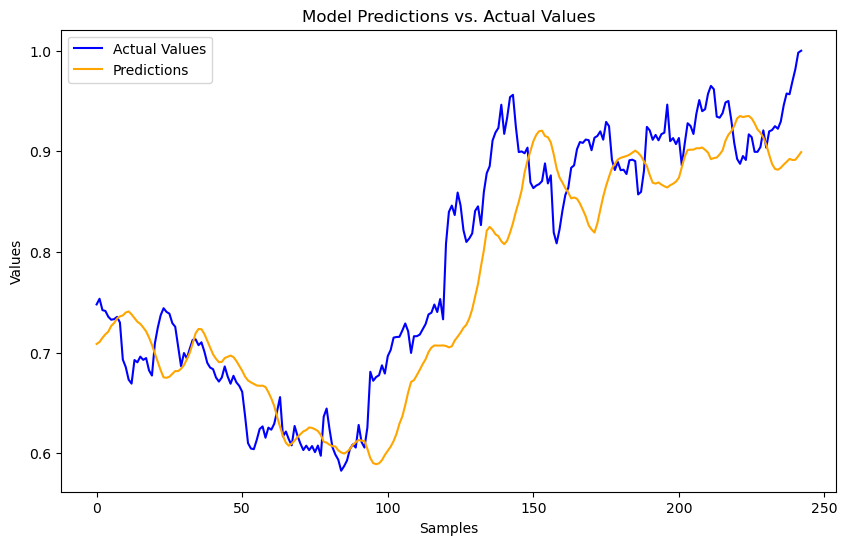

In [348]:
# Make predictions using the final model
y_pred = final_model.predict(X_test_adjusted)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.plot(y_test_adjusted, label='Actual Values', color='blue')
plt.plot(y_pred, label='Predictions', color='orange')
plt.title('Model Predictions vs. Actual Values')
plt.xlabel('Samples')
plt.ylabel('Values')
plt.legend()
plt.show()
